# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:190%; text-align:center; border-radius:10px 10px;">Supervised Machine Learning Project: Customer Churn with Tree-Based Models</p>

<div class="alert alert-block alert-info alert">

## <span style=" color:#bf2e98">Introduction

#### Goal of the Project: Create a model to predict whether or not a customer will Churn.

For this project we will explore the churn of an internet and telephone provider, including...
* Explatory Data Analysis
* Cohort and Churn Analysis
* Predictive Machine Learning

### What is Cohort Analysis?
Cohort Analysis is a form of behavioral analytics that takes data from a given subset and groups it into related groups rather than looking at the data as one unit. The groupings are referred to as cohorts. They share similar characteristics such as time and size.

**Companies use cohort analysis to analyze customer behavior across the life cycle of each customer.** In the absence of cohort analysis, businesses may experience difficulties in understanding the life cycle that each customer goes through over a given timeframe. Businesses use cohort analysis to understand the trends and patterns of customers over time and to tailor their offers of products and services to the identified cohorts.

Once the company sees trends in how different cohorts use its products, it can identify problems in its marketing techniques and determine when and how to best communicate with different groups or types of customers. The business also uses the broken-down data to design incentives that will motivate customers to keep using their products when they are likely to stop purchasing the products.
</div>

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Exploratory Data Analysis

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



**Take a look at the datatypes and non-null values in the dataframe.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


<div class="alert alert-block alert-success">
<span style=" color:#eb346e">

**Insight:** We notice that many columns are categorical, meaning we will eventually need to convert them to dummy variables (0 and 1).</span>

**Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Alternatice way to see the number of missing values for each column
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Get a quick statistical summary of the numeric columns.**

In [7]:
# For numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


**Display the balance of the class labels (Churn) with a Count Plot.**

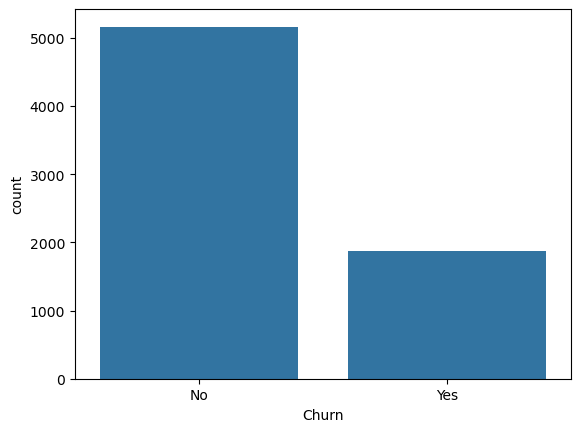

In [8]:
sns.countplot(df, x="Churn");

In [9]:
# We can also see the number of Churn categories
df["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

<div class="alert alert-block alert-success">
<span style=" color:#eb346e">

**Insight:** It is an imbalanced data in terms of target variable (Churn).</span>

**Explore the distrbution of TotalCharges according to Churn categories with a Box Plot or Violin Plot.**

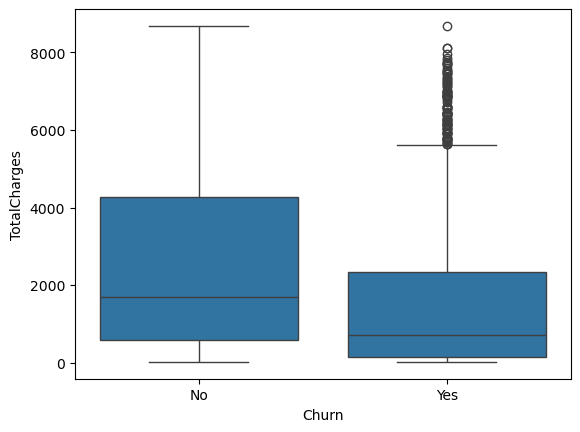

In [10]:
# Bar Plot
sns.boxplot(df, x="Churn", y="TotalCharges");

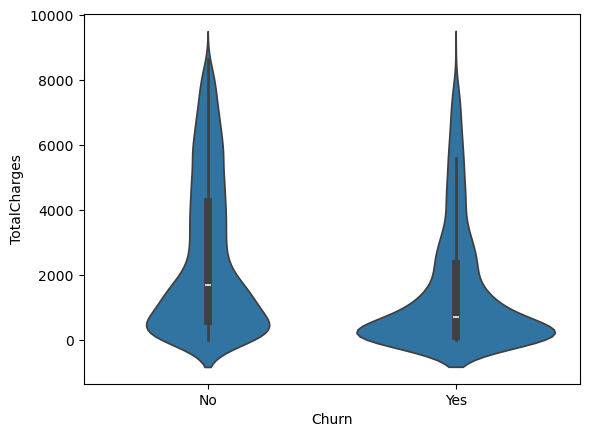

In [11]:
# Violin Plot
sns.violinplot(df, x="Churn", y="TotalCharges");

**Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

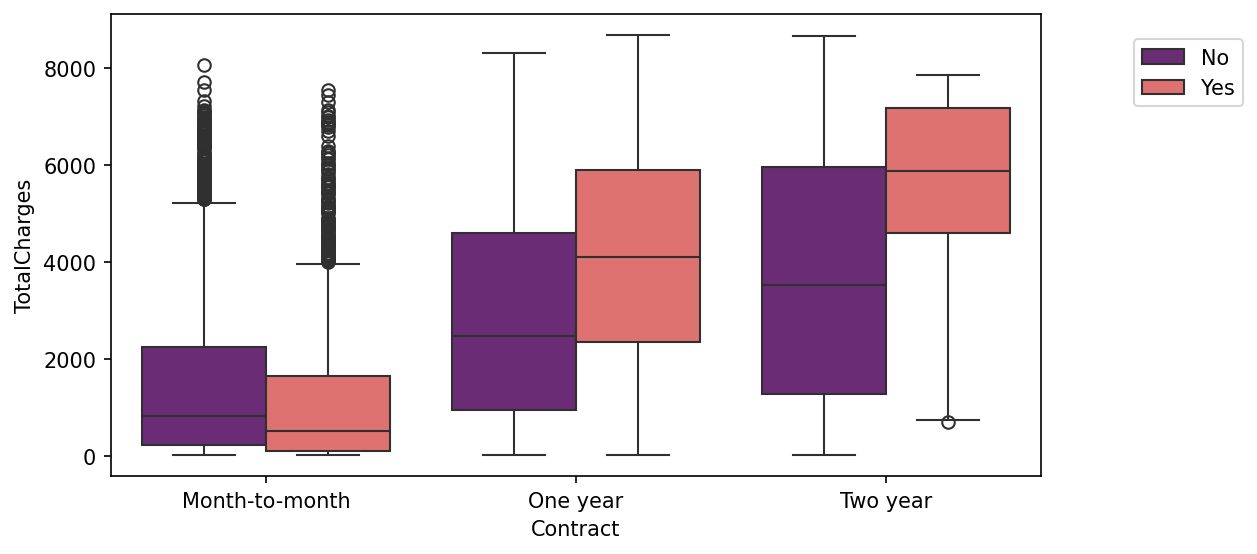

In [12]:
plt.figure(figsize=(8,4),dpi=150)
sns.boxplot(df, x="Contract", y="TotalCharges", hue="Churn", palette="magma")
# to dsiplay legend outside the plot
plt.legend(loc=(1.1,0.8));

<div class="alert alert-block alert-success">
<span style=" color:#eb346e">

**Insight:** In the month-to-month contract, there is no discernable difference between churn (Yes) and contuniunig (No) customers in terms of total charges.  Compared to the other contract types, total charges are lower. Only in this contract type, total charges of the churn (Yes) customers are lower than non-churn customers. On the other hand, when the contract time increases, total charges increase more for the "Yes" group than the "No" group. After one year or two years, as total charges increase, people are more prone to churn.</span>

**Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, we will need to convert them into dummy variables first, as we can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [13]:
# Let's see the columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
# See dummy variables first
pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 
        'PaperlessBilling', 'PaymentMethod','Churn']], dtype=int)

# Note: without "dtype" it shows only True/False instead of 0s and 1s

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,1,1,...,1,0,1,0,0,0,0,1,1,0
2,0,0,1,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,1
3,0,0,1,1,0,1,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4,0,1,0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,0,1,0,1,0,1,0,...,1,0,0,1,0,0,0,1,1,0
7028,0,1,0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
7029,0,1,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
7030,1,0,1,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [15]:
# Correlation

corr_df = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 
        'PaperlessBilling', 'PaymentMethod','Churn']], dtype=int).corr()

In [16]:
corr_df

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982
Dependents_No,0.210550,0.010349,-0.010349,0.452269,-0.452269,1.000000,-1.000000,-0.001078,0.001078,-0.023388,...,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448,-0.163128,0.163128
Dependents_Yes,-0.210550,-0.010349,0.010349,-0.452269,0.452269,-1.000000,1.000000,0.001078,-0.001078,0.023388,...,0.069222,0.201699,0.110131,-0.110131,0.052369,0.061134,-0.149274,0.056448,0.163128,-0.163128
PhoneService_No,-0.008392,-0.007515,0.007515,0.018397,-0.018397,-0.001078,0.001078,1.000000,-1.000000,-0.315218,...,0.003142,-0.004442,0.016696,-0.016696,-0.008271,0.006916,-0.002747,0.004463,0.011691,-0.011691
PhoneService_Yes,0.008392,0.007515,-0.007515,-0.018397,0.018397,0.001078,-0.001078,-1.000000,1.000000,0.315218,...,-0.003142,0.004442,-0.016696,0.016696,0.008271,-0.006916,0.002747,-0.004463,-0.011691,0.011691
MultipleLines_No,-0.136377,-0.004335,0.004335,0.130028,-0.130028,-0.023388,0.023388,-0.315218,0.315218,1.000000,...,0.001694,-0.102756,0.151974,-0.151974,-0.069663,-0.063712,-0.080990,0.222395,0.032654,-0.032654


**Correlation according to Churn_Yes class**

In [17]:
corr_df["Churn_Yes"].sort_values()

Churn_No                                  -1.000000
Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

**Drop the first (Churn_Yes) and the last group (Churn_No) because their correlations are obvious: "-1" and "1" respectively.**

In [18]:
# Do not include the first and the last row
corr_yes_churn = corr_df["Churn_Yes"].sort_values().iloc[1:-1]
corr_yes_churn

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

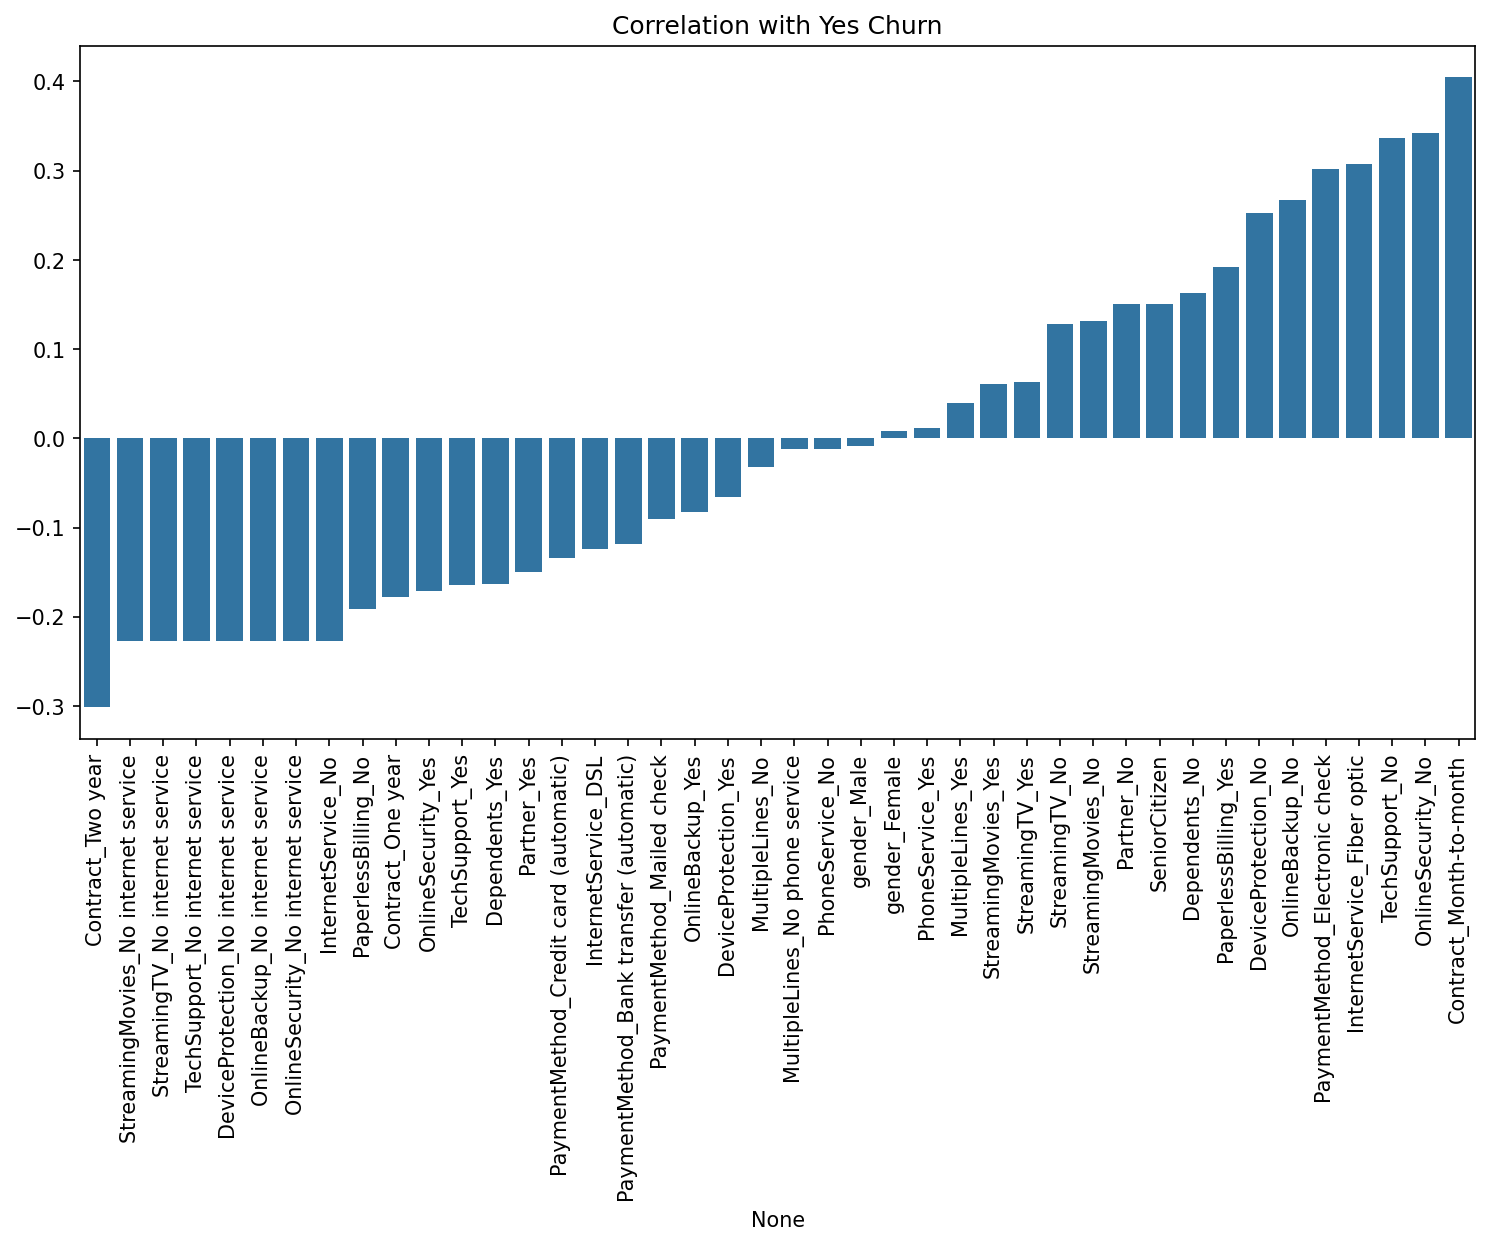

In [19]:
plt.figure(figsize=(12,6), dpi=150)
plt.title("Correlation with Yes Churn")
sns.barplot(x=corr_yes_churn.index, y=corr_yes_churn.values)

# rotate the names in the x axis
plt.xticks(rotation=90);

# "index" for column names in the correlation df
# "values" for the corr values

---
# 2. Cohort and Churn Analysis

**This section focuses on segmenting customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**What are the 3 contract types available?**

In [20]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [21]:
# Alternative way
df["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

**Create a histogram displaying the distribution of 'tenure' column, which shows the amount of months a customer was or has been a customer.**

In [22]:
# Let'ss looka the tenure feature
df["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

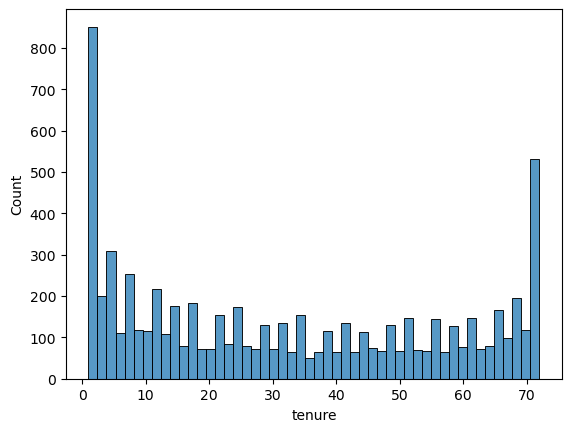

In [23]:
# Histogram
sns.histplot(df, x="tenure", bins=50);

<div class="alert alert-block alert-success">
<span style=" color:#eb346e">
    
**Insight:** The longer bins on the left side show that there are lots of customers leave within a few (1-5) months.</span>

**Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn (Yes, No) and Contract.**

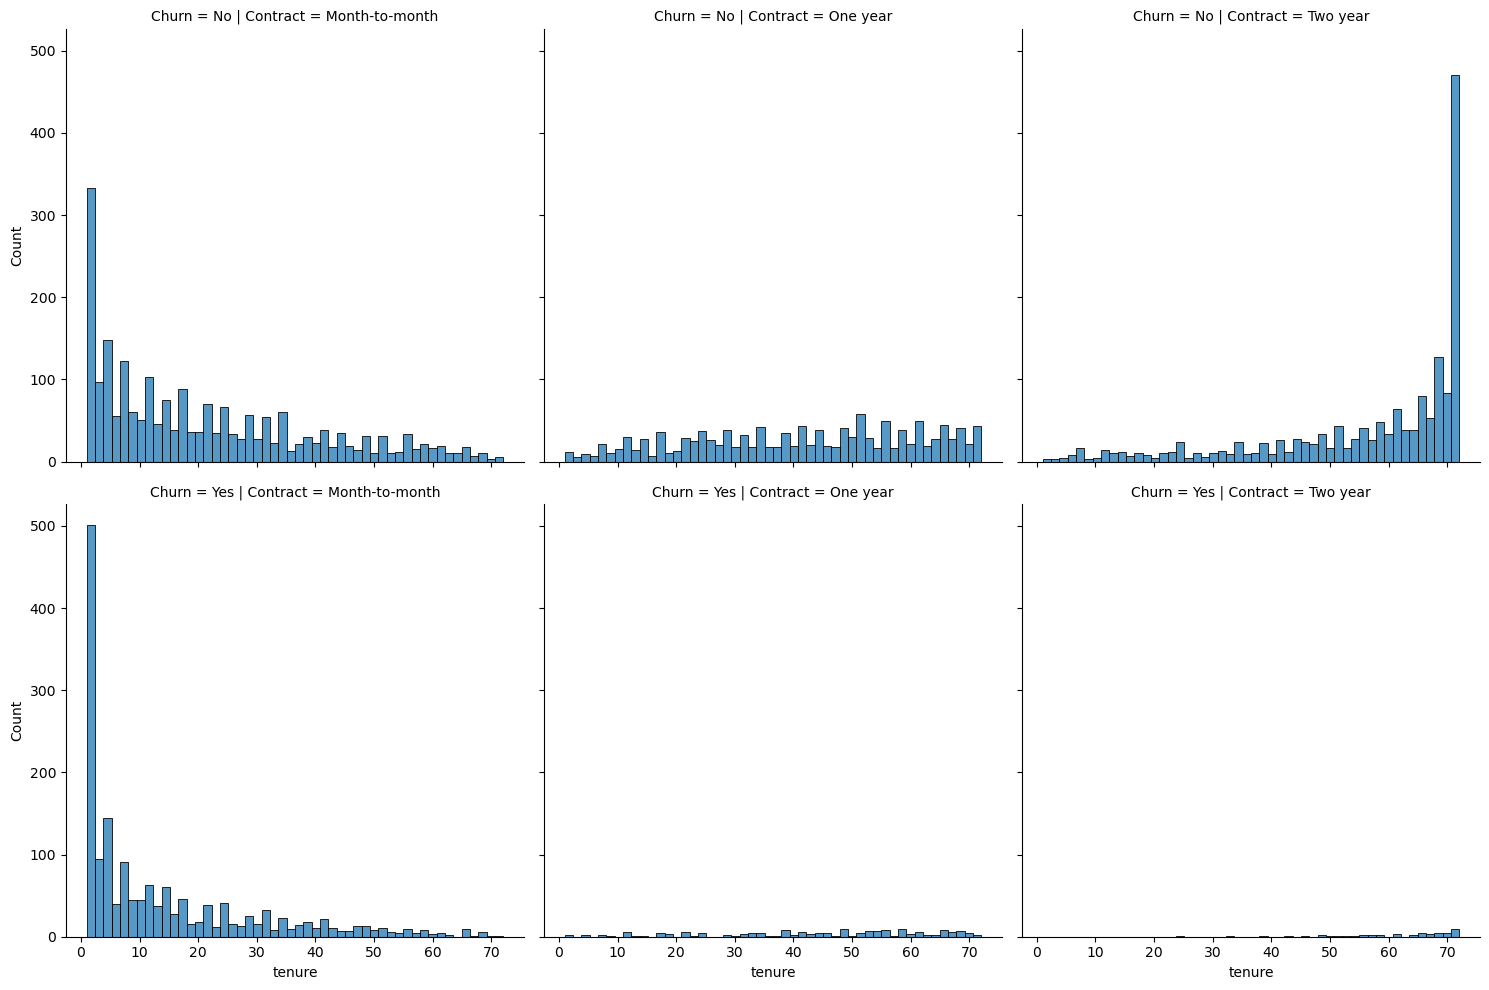

In [24]:
sns.displot(df, x="tenure",bins=50, col="Contract", row="Churn"); # according to Contract types and Churn (Yes or No)

<div class="alert alert-block alert-success">
<span style=" color:#eb346e">

**Insight:** Compared to month-to-month contract, Churn rate is low in one-year and two-year contract types. One of the companies strategy should be to make month-to-month customers stay or sign a long term contract with them. To make their life time span longer, the company should first understand why their customers leave within a few months and why they do not want to sign long term contracts. </span>

**Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

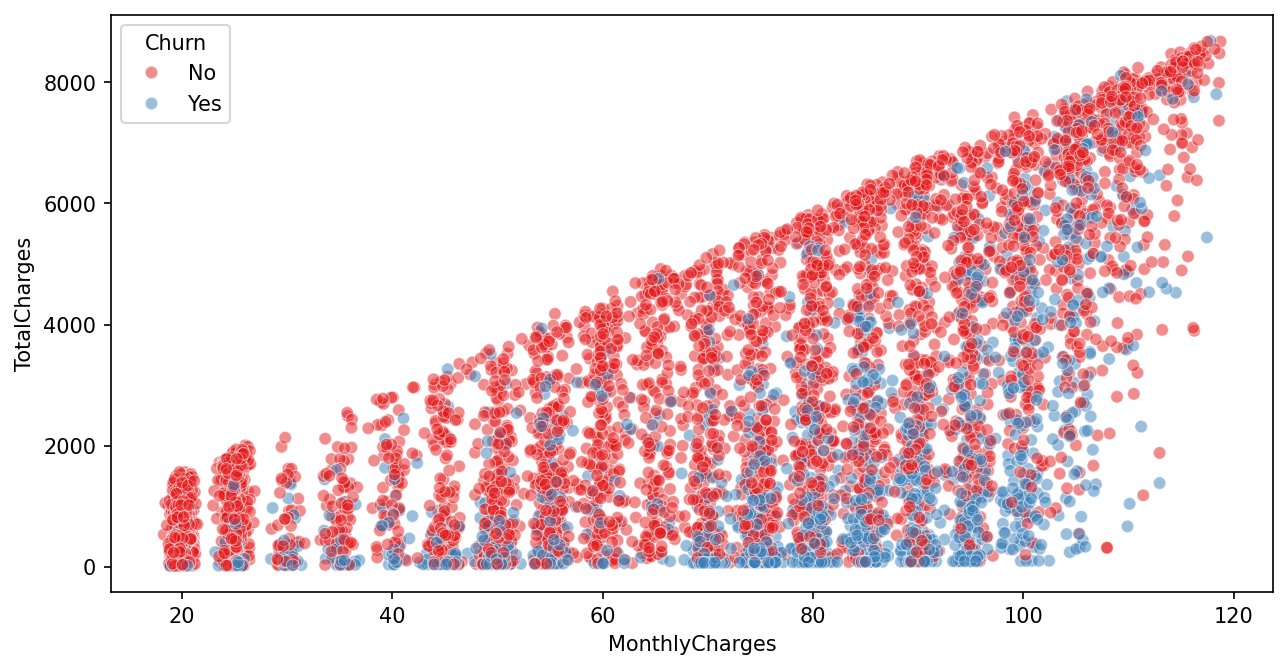

In [25]:
plt.figure(figsize=(10,5), dpi=150)
sns.scatterplot(df, x="MonthlyCharges", y="TotalCharges", hue="Churn", palette="Set1", alpha=0.5, linewidth=0.5);

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**Treating each unique tenure group as a cohort, we can calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. We should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as we are less likely to stop service the longer we've had it.**

In [26]:
# Group by them according to Churn (Yes and No)
df.groupby(["Churn", "tenure"]).count().T

# T for transpose
# count for number of related rows

Churn              No                                        ... Yes        \
tenure             1    2    3   4   5   6   7   8   9   10  ...  63 64 65   
customerID        233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
gender            233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
SeniorCitizen     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Partner           233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Dependents        233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PhoneService      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
MultipleLines     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
InternetService   233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
OnlineSecurity    233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
OnlineBackup      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
DeviceProtection  233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
TechSupport       233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
StreamingTV       233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
StreamingMovies   233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Contract          233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PaperlessBilling  233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PaymentMethod     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
MonthlyCharges    233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
TotalCharges      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   

Churn                                     
tenure            66  67 68 69  70 71 72  
customerID        13  10  9  8  11  6  6  
gender            13  10  9  8  11  6  6  
SeniorCitizen     13  10  9  8  11  6  6  
Partner           13  10  9  8  11  6  6  
Dependents        13  10  9  8  11  6  6  
PhoneService      13  10  9  8  11  6  6  
MultipleLines     13  10  9  8  11  6  6  
InternetService   13  10  9  8  11  6  6  
OnlineSecurity    13  10  9  8  11  6  6  
OnlineBackup      13  10  9  8  11  6  6  
DeviceProtection  13  10  9  8  11  6  6  
TechSupport       13  10  9  8  11  6  6  
StreamingTV       13  10  9  8  11  6  6  
StreamingMovies   13  10  9  8  11  6  6  
Contract          13  10  9  8  11  6  6  
PaperlessBilling  13  10  9  8  11  6  6  
PaymentMethod     13  10  9  8  11  6  6  
MonthlyCharges    13  10  9  8  11  6  6  
TotalCharges      13  10  9  8  11  6  6  

[19 rows x 144 columns]

In [27]:
# Grab only "Yes" Churn
yes_churn = df.groupby(["Churn", "tenure"]).count().T["Yes"]
yes_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


In [28]:
# Grab only "No" Churn
no_churn = df.groupby(["Churn", "tenure"]).count().T["No"]
no_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [29]:
# Find the Churn rate 
churn_rate = 100*yes_churn / (no_churn + yes_churn)
churn_rate

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
gender,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
SeniorCitizen,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Partner,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Dependents,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
PhoneService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
MultipleLines,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
InternetService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineSecurity,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineBackup,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459


In [30]:
# All features have the same rate. We can use Customer ID for Churn rate
# tenure represents months
churn_rate.T["customerID"]

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**Create a Heatmap to display Churn Rates by months (tenure)**

In [99]:
customer_churn_rate = churn_rate.T["customerID"] # it is Series

# Convert the Series to a DataFrame
customer_churn_rate_df = customer_churn_rate.to_frame()

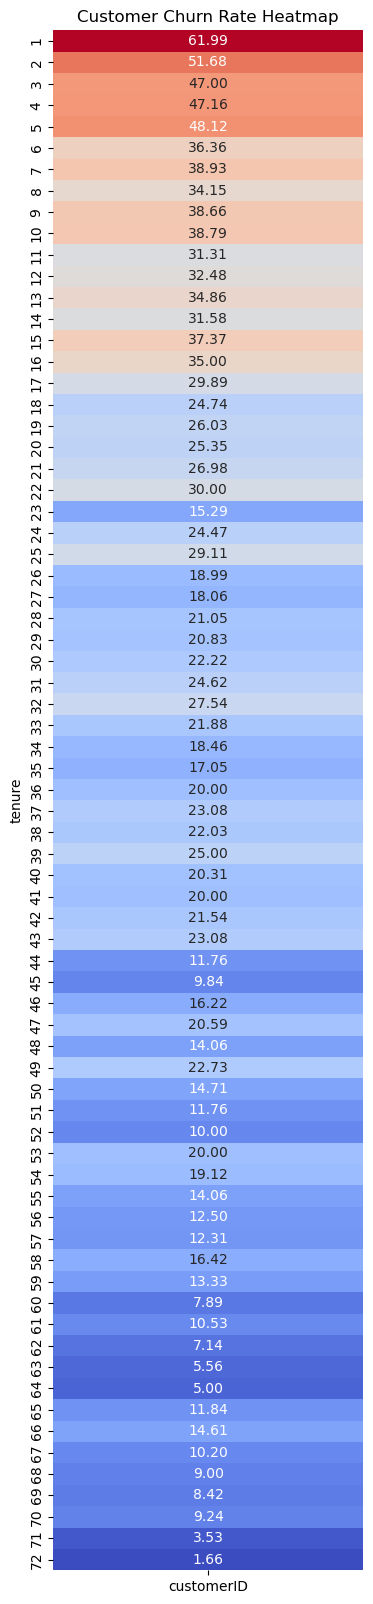

In [127]:
# One column, multiple rows (to change the direction, remove T)
customer_churn_rate_df = customer_churn_rate_df.T

# Create the heatmap
plt.figure(figsize=(4, 20))
sns.heatmap(customer_churn_rate_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
plt.title('Customer Churn Rate Heatmap')
plt.show();

# Heatmap Parameters:

# cmap="coolwarm": Color map for the heatmap
# annot=True: Annotates each cell with the churn rate value
# fmt=".2f": Formats the annotation to two decimal places
# cbar=False: Disables the color bar if not needed

<div class="alert alert-block alert-success">
<span style=" color:#eb346e">

**Insight:**  The first 5 month is critical to churn. The churn rate in the first month is quite high: %61.99.</span>

**Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

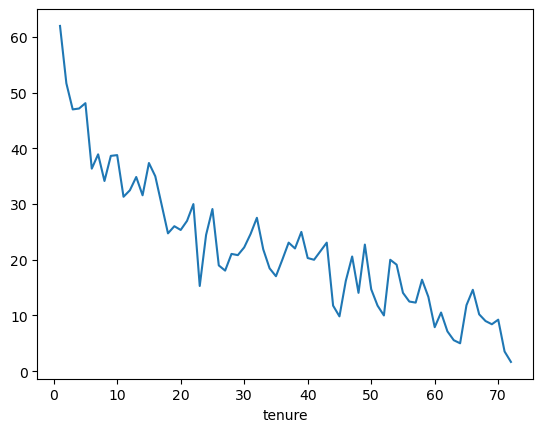

In [31]:
# Display it
churn_rate.T["customerID"].plot();

### Broader Cohort Groups
**Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '13-24 Months'
   * '25-48 Months'
   * 'Over 48 Months'    

In [32]:
# Let's write a function to create these subcategories

def cohort(tenure):
    if tenure < 13:
        return '0-12 Months' # 1 year
    elif tenure < 25:
        return '13-24 Months' # 2 years
    elif tenure < 49:
        return '25-48 Months' # 2-4 years
    else:
        return 'Over 48 Months' # more than 4 years

In [33]:
# Apply cohort function and assign it 

df["Tenure Cohort"] = df["tenure"].apply(cohort)
df["Tenure Cohort"]

0          0-12 Months
1         25-48 Months
2          0-12 Months
3         25-48 Months
4          0-12 Months
             ...      
7027      13-24 Months
7028    Over 48 Months
7029       0-12 Months
7030       0-12 Months
7031    Over 48 Months
Name: Tenure Cohort, Length: 7032, dtype: object

In [34]:
# See tenure and this new Tenure Cohort categories as DF
df[["Tenure Cohort", "tenure"]]

,Tenure Cohort,tenure
0,0-12 Months,1
1,25-48 Months,34
2,0-12 Months,2
3,25-48 Months,45
4,0-12 Months,2
...,...,...
7027,13-24 Months,24
7028,Over 48 Months,72
7029,0-12 Months,11
7030,0-12 Months,4


**Create a scatterplot of Total Charges versus Monthly Charts, colored by Tenure Cohort defined in the previous task.**

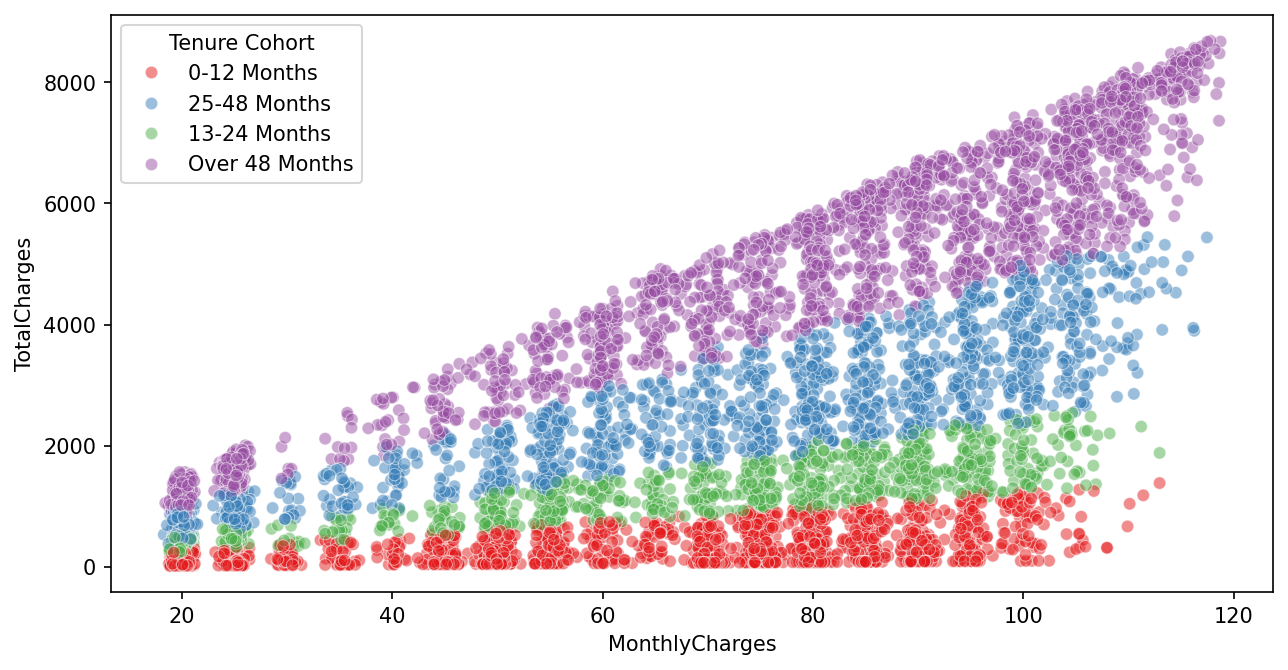

In [35]:
plt.figure(figsize=(10,5), dpi=150)
sns.scatterplot(df, x="MonthlyCharges", y="TotalCharges", 
                hue="Tenure Cohort", palette="Set1", 
                alpha=0.5, linewidth=0.5);

**Create a count plot showing the churn count per cohort.**

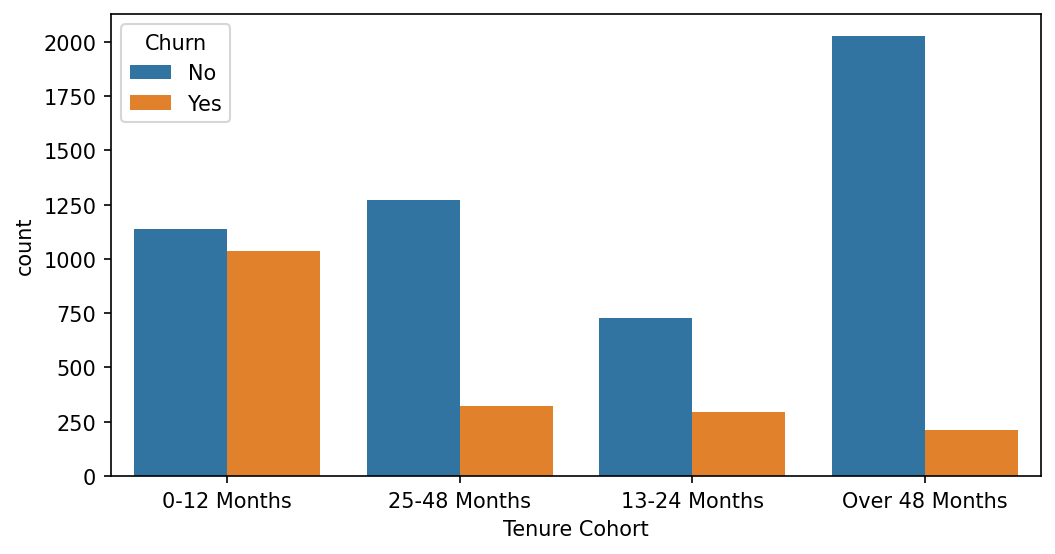

In [36]:
plt.figure(figsize=(8,4), dpi=150)
sns.countplot(df, x="Tenure Cohort", hue="Churn");

<div class="alert alert-block alert-success">
<span style=" color:#eb346e">

**Insight:** Customers staying over 48 months are not likely to churn. On the contrary, people are most likely to churn within 1 year.</span>

**Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

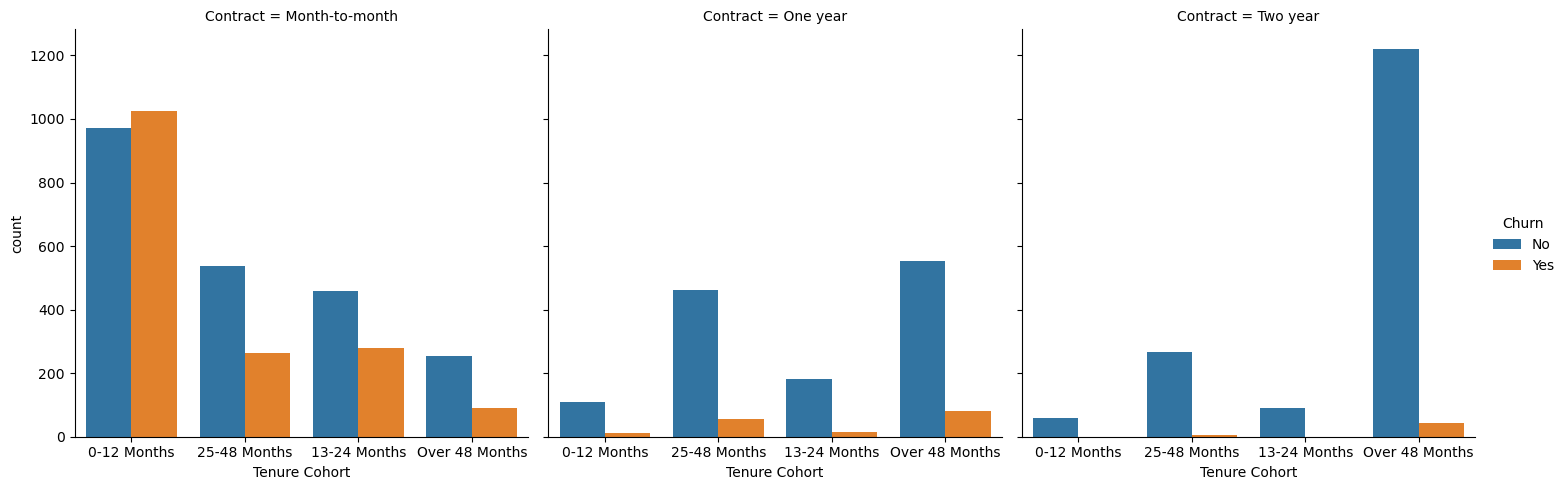

In [37]:
sns.catplot(df, x="Tenure Cohort", col="Contract", hue="Churn", kind="count");

# do not forget to write "kind" argument because we want to display a countplot
# we could add another feature as row=""

-----


<div class="alert alert-block alert-info alert">

# <span style=" color:#bf2e98">3. Predictive Modeling

**Let's explore 4 different tree based methods in this part:** 
* A Single Decision Tree
* Random Forest
* AdaBoost
* Gradient Boosting
</div>


## 3.1. Single Decision Tree

**Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [55]:
# Since we do not need customerID in ML models, we can drop it
# Also, Churn is our target variable and represents "y"

X = df.drop(["Churn", "customerID"], axis=1)

# get_dummies
X = pd.get_dummies(X, dtype=int, drop_first=True)

# without "dtype" argument, it shows boolean (True or False) not 0 and 1

In [56]:
y = df["Churn"]

**Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101.**

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=101)

<div class="alert alert-block alert-success">
    
<span style=" color:#eb346e">

**Decision Tree Perfomance:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. Plot your tree. Note that the tree could be huge depending on your pruning, so it may crash the notebook if you display it with plot_tree.
</span>

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
# Create the DT model
dt = DecisionTreeClassifier(max_depth=6)

In [61]:
# Fit the model with training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

**Evaluate the performance of the model**

In [62]:
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
# get the predictions over X_test
preds = dt.predict(X_test)

In [64]:
# Confusion Matrix
confusion_matrix(y_test, preds) # y_true,y_pred

array([[498,  59],
       [ 75,  72]], dtype=int64)

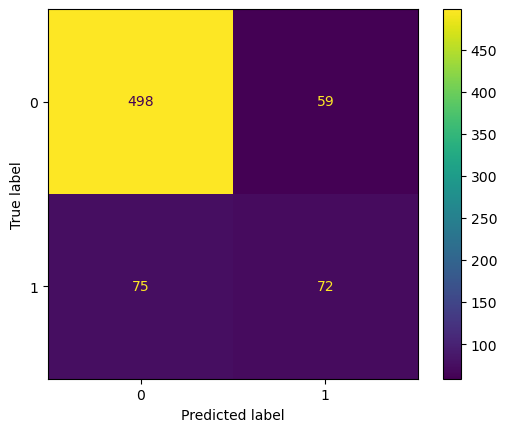

In [65]:
# to plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, preds);

In [66]:
# Classification Report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       557
           1       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



<div class="alert alert-warning alert-info">  
<span style=" color:#bf2e98"> 

**Result:** Since the data has an imbalanced class in terms of "Yes", as expected, the DT model could not predict the "Yes" labels well. Also, the overall accuracy is not satisfactory: 0.81.

As seen from the confusion matrix above, the model predicts *75* true Yes labels (churn customers) as No Churn. It is important because we want to predict especially Churn customers (Yes labels) to be used in our future campaigns and strategies and the model is not good enough to predict this category.</span>

**Show the Feature importance**

In [67]:
dt.feature_importances_

array([0.0126805 , 0.31956232, 0.04229274, 0.06613492, 0.10435175,
       0.        , 0.00123697, 0.        , 0.        , 0.00785158,
       0.        , 0.01243191, 0.31406016, 0.        , 0.        ,
       0.00837585, 0.02628952, 0.00534132, 0.        , 0.        ,
       0.        , 0.00786752, 0.        , 0.        , 0.        ,
       0.        , 0.01002118, 0.02706543, 0.        , 0.        ,
       0.03443632, 0.        , 0.        , 0.        , 0.        ])

In [68]:
imp_features = pd.DataFrame(data=dt.feature_importances_,
                           index=X.columns,
                           columns=["Feature Importance"])

# sort the feature importance df by "Feature Importance" column
imp_features.sort_values("Feature Importance")

,Feature Importance
Tenure Cohort_Over 48 Months,0.000000
Tenure Cohort_25-48 Months,0.000000
TechSupport_No internet service,0.000000
StreamingTV_No internet service,0.000000
OnlineSecurity_No internet service,0.000000
InternetService_No,0.000000
StreamingTV_Yes,0.000000
StreamingMovies_No internet service,0.000000
MultipleLines_No phone service,0.000000
StreamingMovies_Yes,0.000000


In [69]:
# Grab only the features above 0
imp_feats = imp_features.sort_values("Feature Importance")

imp_feats = imp_feats[imp_feats["Feature Importance"]>0]
imp_feats

,Feature Importance
gender_Male,0.001237
OnlineBackup_Yes,0.005341
PhoneService_Yes,0.007852
TechSupport_Yes,0.007868
OnlineSecurity_Yes,0.008376
Contract_One year,0.010021
MultipleLines_Yes,0.012432
SeniorCitizen,0.012680
OnlineBackup_No internet service,0.026290
Contract_Two year,0.027065


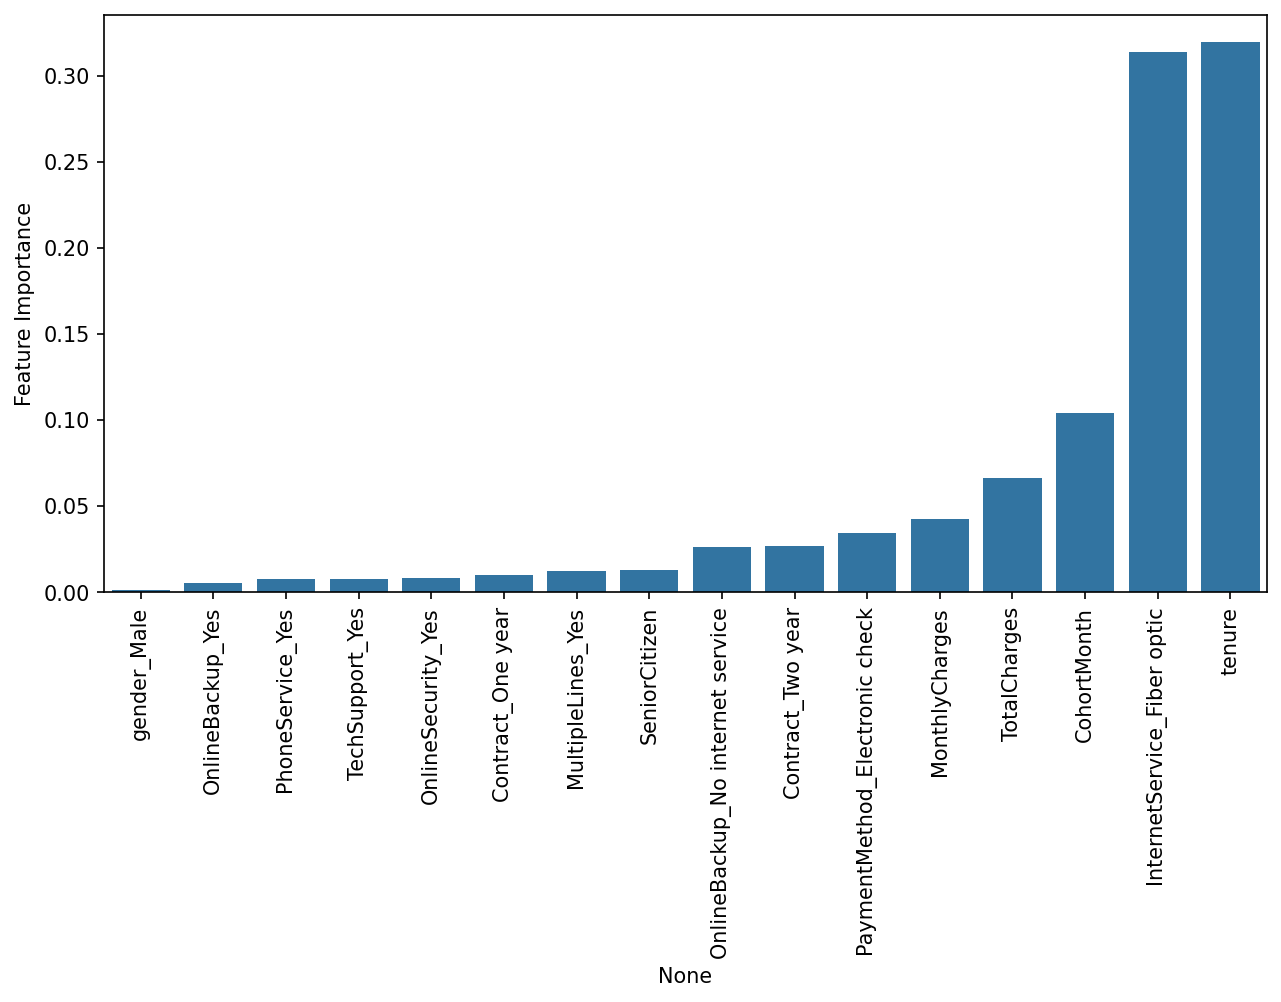

In [70]:
# Use barplot to visualize it

plt.figure(figsize=(10,5), dpi=150)
sns.barplot(imp_feats, x=imp_feats.index, y="Feature Importance")
plt.xticks(rotation=90);

<div class="alert alert-block alert-success">
<span style=" color:#eb346e">

**Insight:** This barplot shows which features are used by Decision Tree Classifier. "Tenure" followed by "InternetService_Fiber optic" are the most important features for the model.
</span>

**Plot the Tree**

In [71]:
from sklearn.tree import plot_tree

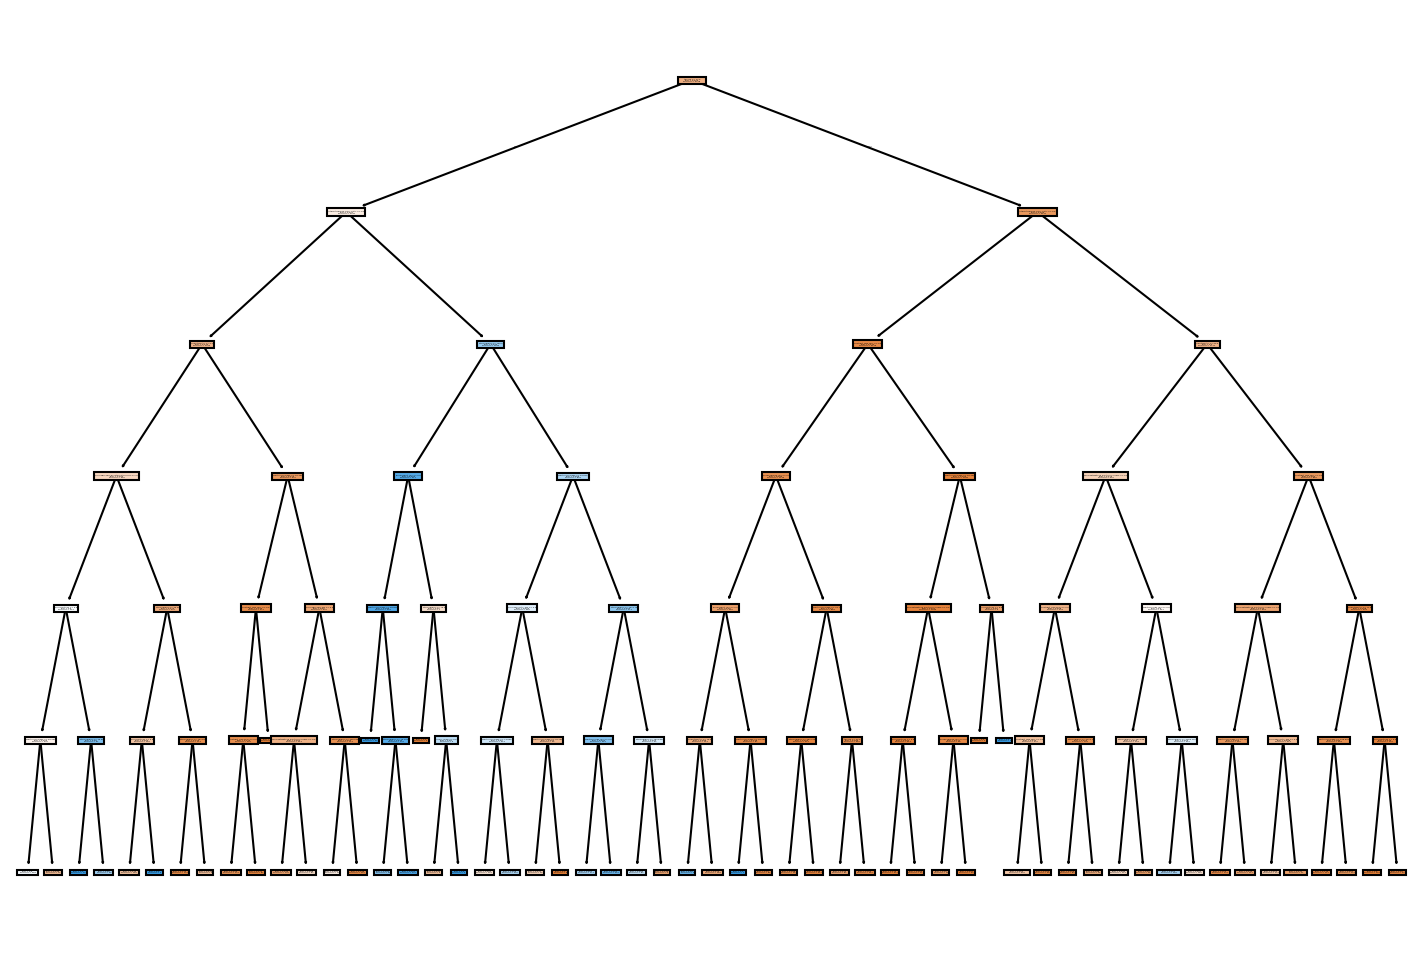

In [72]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt,filled=True,feature_names=X.columns);

# Since it is a long tree, we cannot see the details and explanations on it
# If necessary, we can prune it to have details

## 3.2. Random Forest

**Create a Random Forest model, a classification report and confusion matrix from its predicted results on the test set.**

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
# RF model with default parameters
rf = RandomForestClassifier()

In [75]:
# Fit the model with training data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
# predictions
preds = rf.predict(X_test)

**Evaluation of performance of the RF model**

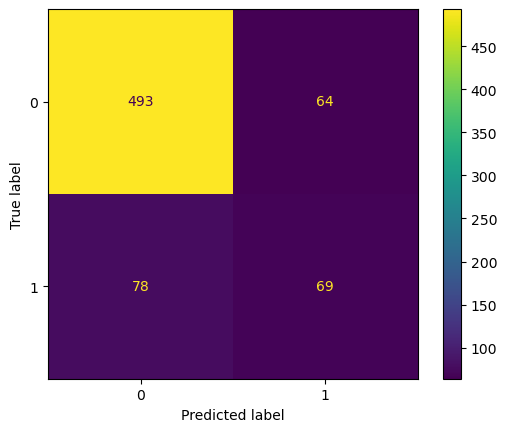

In [77]:
# Plot the Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_test, preds)

In [78]:
# Classification Report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       557
           1       0.52      0.47      0.49       147

    accuracy                           0.80       704
   macro avg       0.69      0.68      0.68       704
weighted avg       0.79      0.80      0.79       704



<div class="alert alert-warning alert-info">
<span style=" color:#bf2e98"> 

**Result:** Random Forest model with default values provides lower accuracy score than Decision Tree model. The sores for "Yes" Churn category also lower than the previous DT model. To have better scores, we can change the parameters in the RF model. To do it, we can use Grid Search.</span>

#### Random Forest model with Grid Search

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
# For the best Hyperparameters

param_grid = {"n_estimators":[64, 100, 128, 200],     
              "max_depth": [5, 6, 7, 8],
              "min_samples_leaf": [1, 2, 3, 4],
              "min_samples_split": [2, 3, 5, 6],
              "max_features":['auto', len(df.columns)/3, 2, 4]}

# The Data has 21 columns but the X data has 19 (customerID and Churn columns were excluded)

In [81]:
# RF Grid model

rfc = RandomForestClassifier()
grid= GridSearchCV(estimator=rfc,
                          param_grid=param_grid, # cv=10,
                          n_jobs = -1)

In [82]:
grid.fit(X_train,y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2560 fits failed out of a total of 5120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1061 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\admin\anaconda3\Lib\site-pac

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 8.0, 2, 4],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5, 6],
                         'n_estimators': [64, 100, 128, 200]})

In [83]:
grid.best_estimator_

RandomForestClassifier(max_depth=8, max_features=4, min_samples_leaf=4,
                       min_samples_split=6, n_estimators=128)

In [84]:
grid.best_params_

{'max_depth': 8,
 'max_features': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 128}

In [85]:
# Predictions of the Grid model
grid_pred = grid.predict(X_test)

**Performance of the RF model with Grid Search**

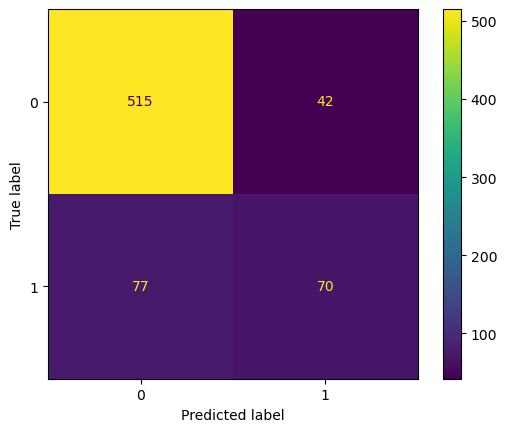

In [86]:
# Plot Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, grid_pred);

In [87]:
# Classification Report
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       557
           1       0.62      0.48      0.54       147

    accuracy                           0.83       704
   macro avg       0.75      0.70      0.72       704
weighted avg       0.82      0.83      0.82       704



<div class="alert alert-warning alert-info">
<span style=" color:#bf2e98"> 

**Result:** Compared to Decision Trees model and RF model with default parameters, RF model with Grid Search improved the accuracy score (0.83). It also has a higher precision, recall and F1-score for the imbalanced Yes Churn category.</span>

## 3.3. Boosted Trees

**Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [88]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

In [89]:
# Create AdaBoosting model
ada_model = AdaBoostClassifier()

In [90]:
# Create GradientBoosting model
gb_model = GradientBoostingClassifier()

In [91]:
# Fit the models
ada_model.fit(X_train, y_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [92]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [93]:
# Predictions
ada_preds =ada_model.predict(X_test)

In [94]:
gb_preds =gb_model.predict(X_test)

In [95]:
# Results for AdaBoosting model

print(classification_report(y_test, ada_preds))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       557
           1       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [96]:
# Results for GradientBoosting model
print(classification_report(y_test, gb_preds))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89       557
           1       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



Since the Adaboosting model perdormed better for the "Yes" category, we can plot its confusion matrix to compare the true and predcited Yes labels.

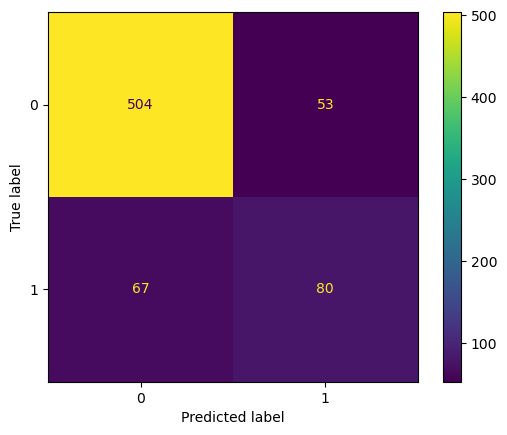

In [97]:
# Confusion Matrix for the Adaboosting model

ConfusionMatrixDisplay.from_predictions(y_test, ada_preds);

**Analyze your results: which model performed best?**

<div class="alert alert-block alert-success">
    
#### <span style=" color:#eb346e">Conclusion:
Compared the tree-based model above, the AdaBoositng model provided the best overall accuracy score (*0.83*) together with Random Forests model with Grid Search. On the other hand, Random Forests (with default parameters), Decision Trees and GradientBoosting models could reach up to *0.80*, *0.81* and *0.82* accuracy, respectively. 

Additionally, the Adaboosting model provides the highest recall (0.54) and F1-score (0.57) for the "Yes" Churn category, which is very important for the company's projections. It also gives the highest precision (0.60) score after the RF model with Grid Search (0.62). 

As seen from the confusioon matrix, the number of misclassified "Yes" labels decreased in the Adaboosting model (*67*). It was *75* in Decision Trees and *77* in Random Forests Grid Search model. As we did in Random Forest model, to receive higher scores, we can also try these boosting models with Grid Search and see if the scores change.
</span>